<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/5_kinds_of_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
folder = '/content/drive/MyDrive/flower/'

In [26]:
photos, labels = list(), list()
for file in listdir(folder):
     output = 0.0
     if file.startswith('rose'):
         output = 1
     if file.startswith('lotus'):
        output = 2
     if file.startswith('water'):
        output = 3
     if file.startswith('apricot'):
        output = 4
     if file.startswith('daisy'):
        output = 5
     if file.startswith('pink'):
        output = 6
     img = load_img(folder+file, target_size=(200,200))
     photo = img_to_array(img)
     photos.append(photo)
     labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(180, 200, 200, 3) (180,)


In [27]:
save('Flower_photos_train.npy',photos)
save('Flower_labels_train.npy',labels)

In [28]:
import numpy as np
x_train = np.load('/content/Flower_photos_train.npy')
y_train = np.load('/content/Flower_labels_train.npy')
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [29]:
#32 lan tich chap
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3), padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))
#64 lan tich chap
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))
#128 lan tich chap
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [30]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1)
model.save('Flower_train.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 50, 50, 64)       

In [31]:
from keras.models import load_model
model5 = load_model('/content/Flower_train.h5/')

1/1 [==============================] - 0s 215ms/step


'daisy'

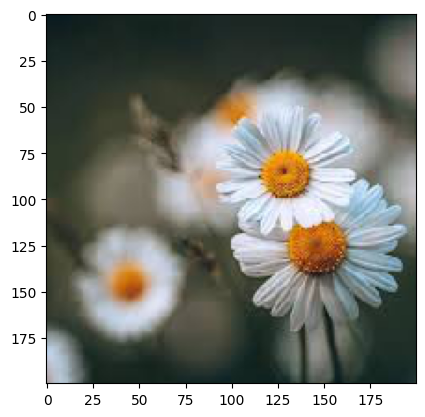

In [32]:
vat = {1: 'rose', 2: 'lotus', 3: 'water lily', 4: 'apricot', 5:'daisy', 6:'pink'}
img = load_img("/content/drive/MyDrive/flower/daisy18.jpg", target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
result = np.argmax(model5.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 31ms/step


'lotus'

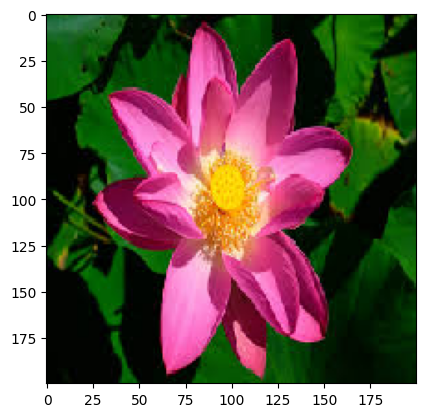

In [33]:
vat = {1: 'rose', 2: 'lotus', 3: 'water lily', 4: 'apricot', 5:'daisy', 6:'pink'}
img = load_img("/content/drive/MyDrive/flower/lotus18.jpg", target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
result = np.argmax(model5.predict(img),axis=1)
vat[result[0]]